<header style="background-color: rgb(0, 62, 92); color: white; margin-top: 20px; padding:28px; ">
  <p style=" text-align: center; font-size: 42px;">  
   <strong> TOPOLOGICAL DATA ANALYSIS </strong></p>
  <p style=" text-align: center; font-size: 36px;"><strong> GROUP PROJECT (GROUP 10) </strong></p>
  <p style=" text-align: center; font-size: 28px;"> Fadhil Ramadhani  </p>
    <p style=" text-align: center; font-size: 28px;"> Evans MUSONDA </p>
    <p style=" text-align: center; font-size: 28px;"> Emmanuel DJIMMO TALLA </p>
  <p style=" text-align: center; font-size: 24px;"> African Institute for Mathematical Sciences </p>
</header>

# Project 2 : MNIST Classification with Persistent Diagrams


## Overview
This project focuses on classifying MNIST digit images using topological data analysis (TDA) techniques to extract features from persistent diagrams. The goal is to improve upon the baseline accuracy obtained in the `MNIST-classification.ipynb` notebook by carefully selecting and engineering features and leveraging machine learning classifiers.

In our work, we used radial filtrations with various centers to generate persistent diagrams from MNIST images. From these diagrams, we applied Carlsson Coordinates as features to represent the topological properties of the data. By carefully selecting and combining these features, we created a feature vector of no more than 200 dimensions, which was then used to train a Random Forest classifier.


As a result, our approach achieved an accuracy of **95%** on the test set of 60 unseen images. This highlights the strength of TDA-based feature extraction, specifically using radial filtrations and Carlsson Coordinates, in improving digit classification performance.



## Selecting a sample

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import random


data_X = np.load('/home/emmanuel/Desktop/Topological Data Analysis/Project_2/X_' + str(1000) + '.npy', allow_pickle=True)
data_y = np.load('/home/emmanuel/Desktop/Topological Data Analysis/Project_2/y_'  + str(1000) + '.npy', allow_pickle=True)

train_size, test_size = 250, 60

# Reshape to (n_samples, n_pixels_x, n_pixels_y)
y = data_y
X = data_X.reshape((-1, 28, 28))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_size, test_size=test_size, stratify=y, random_state=24)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (250, 28, 28), y_train shape: (250,)
X_test shape: (60, 28, 28), y_test shape: (60,)


### Persistence diagram

In [5]:
from gtda.images import RadialFiltration
from gtda.images import Binarizer
from gtda.homology import CubicalPersistence
from sklearn.pipeline import make_pipeline, make_union
from gtda.diagrams import PersistenceEntropy
from gtda.images import HeightFiltration
from gtda.diagrams import Scaler
from sklearn.pipeline import Pipeline
from gtda.diagrams import Amplitude


direction_list = [[1, 1], [-2, 1]]

center_list = [[2, 19],[14, 20],[9,21]]

# Creating a list of all filtration transformer, we will be applying
filtration_list = (
    [
        HeightFiltration(direction=np.array(direction), n_jobs=-1)
        for direction in direction_list
    ]
    + [RadialFiltration(center=np.array(center), n_jobs=-1) for center in center_list]
)

# Creating the diagram generation pipeline
diagram_steps = [
    [
        Binarizer(threshold=0.2, n_jobs=-1),
        filtration,
        CubicalPersistence(n_jobs=-1),
        Scaler(n_jobs=-1),
    ]
    for filtration in filtration_list
]

# Listing all metrics we want to use to extract diagram amplitudes
metric_list = [
    {"metric": "bottleneck", "metric_params": {}},
    {"metric": "wasserstein", "metric_params": {"p": 1}},
    {"metric": "wasserstein", "metric_params": {"p": 2}},
    {"metric": "landscape", "metric_params": {"p": 1, "n_layers": 1, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 1, "n_layers": 2, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 2, "n_layers": 1, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 2, "n_layers": 2, "n_bins": 100}},
    {"metric": "betti", "metric_params": {"p": 1, "n_bins": 100}},
    {"metric": "betti", "metric_params": {"p": 2, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 1, "sigma": 1.6, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 1, "sigma": 3.2, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 2, "sigma": 1.6, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 2, "sigma": 3.2, "n_bins": 100}},
]

#
feature_union = make_union(
    *[PersistenceEntropy(nan_fill_value=-1)]
    + [Amplitude(**metric, n_jobs=-1) for metric in metric_list]
)

tda_union = make_union(
    *[make_pipeline(*diagram_step, feature_union) for diagram_step in diagram_steps],
    n_jobs=-1
)

In [6]:
from sklearn import set_config
set_config(display='diagram')  

tda_union

FeatureUnion(n_jobs=-1,
             transformer_list=[('pipeline-1',
                                Pipeline(steps=[('binarizer',
                                                 Binarizer(n_jobs=-1,
                                                           threshold=0.2)),
                                                ('heightfiltration',
                                                 HeightFiltration(direction=array([1, 1]),
                                                                  n_jobs=-1)),
                                                ('cubicalpersistence',
                                                 CubicalPersistence(n_jobs=-1)),
                                                ('scaler', Scaler(n_jobs=-1)),
                                                ('featureunion',
                                                 FeatureUnion(transformer_list=[('persistenceentropy',
                                                                                 Persist...
                                                                                           metric_params={'n_bins': 100,
                                                                                                          'p': 1,
                                                                                                          'sigma': 1.6},
                                                                                           n_jobs=-1)),
                                                                                ('amplitude-11',
                                                                                 Amplitude(metric='heat',
                                                                                           metric_params={'n_bins': 100,
                                                                                                          'p': 1,
                                                                                                          'sigma': 3.2},
                                                                                           n_jobs=-1)),
                                                                                ('amplitude-12',
                                                                                 Amplitude(metric='heat',
                                                                                           metric_params={'n_bins': 100,
                                                                                                          'p': 2,
                                                                                                          'sigma': 1.6},
                                                                                           n_jobs=-1)),
                                                                                ('amplitude-13',
                                                                                 Amplitude(metric='heat',
                                                                                           metric_params={'n_bins': 100,
                                                                                                          'p': 2,
                                                                                                          'sigma': 3.2},
                                                                                           n_jobs=-1))]))]))])

In [7]:
X_train_tda = tda_union.fit_transform(X_train)
X_test_tda= tda_union.fit_transform(X_test)
print("From the Persistence diagram we have the following features")
print("="*60)
print("The X_train set has {} samples with {} features".format(X_train_tda.shape[0],X_train_tda.shape[1]))
print("The X_test set has {} samples with {} features".format(X_test_tda.shape[0],X_test_tda.shape[1]))

From the Persistence diagram we have the following features
The X_train set has 250 samples with 140 features
The X_test set has 60 samples with 140 features


### Adding Carlsson Coordinates as features on the same diagram.

In [9]:
# adding carsson coodinates 


direction_list = [[1, 1], [-2, 1]]

center_list = [[2, 19],[14, 20],[9,21]]

# Creating a list of all filtration transformer, we will be applying
filtration_list = (
    [
        HeightFiltration(direction=np.array(direction), n_jobs=-1)
        for direction in direction_list
    ]
    + [RadialFiltration(center=np.array(center), n_jobs=-1) for center in center_list]
)

# Creating the diagram generation pipeline
diagram_steps = [
    [
        Binarizer(threshold=0.2, n_jobs=-1),
        filtration,
        CubicalPersistence(n_jobs=-1),
        Scaler(n_jobs=-1),
    ]
    for filtration in filtration_list
]

tda1_union = make_union(
    *[make_pipeline(*diagram_step) for diagram_step in diagram_steps],
    n_jobs=-1
)




from teaspoon.ML import feature_functions as Ff


diagrams_basic = tda1_union.fit_transform(X_train)
Arr = diagrams_basic[1]
a1=Arr[Arr[:,2]==0].shape[0]; a2=Arr[Arr[:,2]==1].shape[0]

Arr_dim_0 = diagrams_basic[:,0:a1,0:2]; Arr_dim_1 = diagrams_basic[:,a1:a1+a2,0:2]

FN = 5
my_list = [Arr_dim_0, Arr_dim_1]

# compute feature matrix
for i in range(0,2):
    FeatureMatrix, TotalNumComb, CombList = Ff.F_CCoordinates(my_list[i], FN)
    X_train_tda = np.concatenate((X_train_tda, FeatureMatrix[-4]),axis=1)
print("X_train shape after adding Carlsson Coordinates: {}".format(X_train_tda.shape))



diagrams_basic_test = tda1_union.fit_transform(X_test)

Arr = diagrams_basic_test[1]
a1=Arr[Arr[:,2]==0].shape[0]; a2=Arr[Arr[:,2]==1].shape[0]

Arr_dim_0 = diagrams_basic_test[:,0:a1,0:2]; Arr_dim_1 = diagrams_basic_test[:,a1:a1+a2,0:2]

FN = 5
my_list = [Arr_dim_0, Arr_dim_1]

for i in range(0,2):
    
    FeatureMatrix, TotalNumComb, CombList = Ff.F_CCoordinates(my_list[i], FN)
    X_test_tda = np.concatenate((X_test_tda, FeatureMatrix[-4]),axis=1)
print("X_test shape after adding Carlsson Coordinates: {}".format(X_test_tda.shape))



X_train shape after adding Carlsson Coordinates: (250, 148)
X_test shape after adding Carlsson Coordinates: (60, 148)


### Concatenating features and limit to 200 features

X_train_final shape: (250, 148)
X_test_final shape: (60, 148)


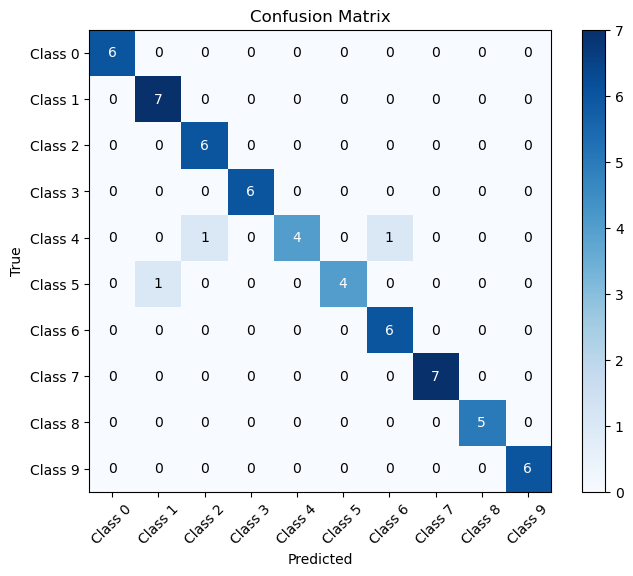

Accuracy: 0.9500


In [13]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Concatenate features and limit to 200 features
X_train_final = X_train_tda[:, :200]
X_test_final = X_test_tda[:, :200]
print("X_train_final shape:", X_train_final.shape)
print("X_test_final shape:", X_test_final.shape)



# Saving features as pickle file

with open('train_features.pkl', 'wb') as f:
    pickle.dump(X_train_final, f)

with open('test_features.pkl', 'wb') as f:
    pickle.dump(X_test_final, f)

# Choose a classifier (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the classifier
clf = RandomForestClassifier( random_state=42)
clf.fit(X_train_final, y_train)

# Make predictions
y_pred = clf.predict(X_test_final)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)


# Computing the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Adding the numbers on the matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

# Add color bar
plt.colorbar()

# Dynamically set class labels
class_labels = [f'Class {i}' for i in range(cm.shape[0])]
plt.xticks(np.arange(cm.shape[1]), class_labels, rotation=45)
plt.yticks(np.arange(cm.shape[0]), class_labels)

# Show the plot
plt.show()
print(f"Accuracy: {accuracy:.4f}")
